In [ ]:
cd /content/drive/MyDrive/GoingDeeper(NLP)

/content/drive/MyDrive/GoingDeeper(NLP)


In [ ]:
pwd

'/content/drive/MyDrive/GoingDeeper(NLP)'

In [ ]:
! pip install konlpy

     |████████████████████████████████| 19.4 MB 8.4 MB/s 
     |████████████████████████████████| 448 kB 67.2 MB/s 


In [ ]:
!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash


--2022-03-25 09:56:50--  https://www.dropbox.com/s/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz?dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.1.18, 2620:100:6016:18::a27d:112
Connecting to www.dropbox.com (www.dropbox.com)|162.125.1.18|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: /s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz [following]
--2022-03-25 09:56:50--  https://www.dropbox.com/s/dl/9xls0tgtf3edgns/mecab-0.996-ko-0.9.2.tar.gz
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc111961a75d21398cf7b46c6da3.dl.dropboxusercontent.com/cd/0/get/BiKiChzXd7Ub7HSRZZ1oYuziv1qG3gfVgE6BGY5hrikV-R6UXZLx0HKqXjgRLG05NY3Q3Fn72n0QpK-RTjU5oA2Yk5wuvyI0i6VNLlN17sG2SOa2XK7dkP7rbM79vPYZsM6H9QL5ZJgVuFoT8VfIfB3OsSfvtsHY7Mks9_tAKBwBfne5HCjSjyMBqDTH36yjW4w/file?dl=1# [following]
--2022-03-25 09:56:51--  https://uc111961a75d21398cf7b46c6da3.dl.dropboxusercontent.com/cd/0/get/

In [ ]:
mkdir -p /content/drive/MyDrive/GoingDeeper\(NLP\)/sp_tokenizer/data

In [ ]:
cd /content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data

/content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data


In [ ]:
! wget https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz

--2022-03-25 09:58:45--  https://github.com/jungyeul/korean-parallel-corpora/raw/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz [following]
--2022-03-25 09:58:45--  https://raw.githubusercontent.com/jungyeul/korean-parallel-corpora/master/korean-english-news-v1/korean-english-park.train.tar.gz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8718893 (8.3M) [application/octet-stream]
Saving to: ‘korean-english-park.train.tar.gz.3’

kore

In [ ]:
! tar -xzvf korean-english-park.train.tar.gz

korean-english-park.train.en
korean-english-park.train.ko


In [ ]:
! ls

korean-english-park.train.en	    korean-english-park.train.tar.gz.3
korean-english-park.train.ko	    korean_spm.model
korean-english-park.train.ko.temp   korean_spm.vocab
korean-english-park.train.tar.gz    naver_review_corpus.temp
korean-english-park.train.tar.gz.1  ratings_test.txt
korean-english-park.train.tar.gz.2  ratings_train.txt


In [ ]:
from konlpy.tag import Mecab

mecab = Mecab()
print(mecab.morphs('자연어처리가너무재밌어서밥먹는것도가끔까먹어요'))

['자연어', '처리', '가', '너무', '재밌', '어서', '밥', '먹', '는', '것', '도', '가끔', '까먹', '어요']


# 0. 여기까지 환경설정 끝!

이제 사용된 

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib as plt
import konlpy

%matplotlib inline

print(tf.__version__)
print(np.__version__)
print(plt.__version__)
print(konlpy.__version__)

2.8.0
1.21.5
3.2.2
0.6.0


# Step 1. SentencePiece 설치하기

In [ ]:
!pip install sentencepiece

     |████████████████████████████████| 1.2 MB 8.6 MB/s 


# Step 2. SentencePiece 모델 학습

네이버 영화 리뷰 데이터를 이용하여 filtered_corpus를 먼저 제작하였습니다.

In [ ]:
import sentencepiece as spm
import os
import pandas as pd

data_file = '/content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data/ratings_train.txt'

test_file = '/content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data/ratings_test.txt'

raw_data = pd.read_table(data_file)
raw_data.head(30)

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
5,5403919,막 걸음마 뗀 3세부터 초등학교 1학년생인 8살용영화.ㅋㅋㅋ...별반개도 아까움.,0
6,7797314,원작의 긴장감을 제대로 살려내지못했다.,0
7,9443947,별 반개도 아깝다 욕나온다 이응경 길용우 연기생활이몇년인지..정말 발로해도 그것보단...,0
8,7156791,액션이 없는데도 재미 있는 몇안되는 영화,1
9,5912145,왜케 평점이 낮은건데? 꽤 볼만한데.. 헐리우드식 화려함에만 너무 길들여져 있나?,1


# 데이터 전처리를 먼저 해주었습니다.

1. 한글 맞춤법 검사기 사용 
2. 중복된 데이터 제거, 너무 긴 혹은 짧은 데이터 삭제를 통한 데이터 정제

### 1. 한글 맞춤법 검사기 사용

In [ ]:
!pip install git+https://github.com/ssut/py-hanspell.git

  Cloning https://github.com/ssut/py-hanspell.git to /tmp/pip-req-build-0e1vhh0o
  Running command git clone -q https://github.com/ssut/py-hanspell.git /tmp/pip-req-build-0e1vhh0o
  Created wheel for py-hanspell: filename=py_hanspell-1.1-py3-none-any.whl size=4868 sha256=12088490df9676c169c07a673f1e95842949950e8c6971c8bf23b20d66540989
  Stored in directory: /tmp/pip-ephem-wheel-cache-fjawja9p/wheels/ab/f5/7b/d4124bb329c905301baed80e2ae45aa14e824f62ebc3ec2cc4
Successfully built py-hanspell


In [ ]:
from hanspell import spell_checker

sent = "맞춤법 틀리면 외 않되? 쓰고싶은대로쓰면돼지 "
spelled_sent = spell_checker.check(sent)

hanspell_sent = spelled_sent.checked
print(hanspell_sent)

맞춤법 틀리면 왜 안돼? 쓰고 싶은 대로 쓰면 되지


위 블록이 제대로 동작하는 것을 확인하고 raw_data 전체를 한글 맞춤법을 수정해주었습니다.

> Not well-formed (invalid token): line 1, column 96 에러가 발생하였으나, 해결하지 못해서 try-except로 구문을 감싸고 예외 처리발생시 그냥 그 문장을 무시하도록 진행하였습니다.

In [ ]:
corrected_data = raw_data['document']

In [ ]:
try:
  for idx in range(len(corrected_data)):
    spelled_sent = spell_checker.check(corrected_data[idx])
    hanspell_sent = spelled_sent.checked  

    corrected_data.iloc[idx] = hanspell_sent
    
    # 제대로 되고있는지 확인하기 위하여 중간중간 뽑아봄.
    if idx % 100 == 0:
      print(idx, hanspell_sent)
except Exception:
  pass      

0 아 더빙.. 진짜 짜증 나네요 목소리


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


100 신카이 마코토의 작화와, 미유와 하나하나가 연기를 잘해줘서 더대 박이었다.
200 TV용 건담 시리즈 중에서 아직까지도 최고봉
300 일본 영화 수입 금지 시절에도 비디오테이프로 돌려봤던 불후의 명작 아 그립다
400 좀 검증된 애들 좀 출현시켜라 이탈리아 특집 장난하냐
500 나 이거 보고 인형 절대 안 삽
600 수많은 최루성 멜로는 여기에서...
700 음악영화라 나에겐 취향 저격이지만... 비긴 어게인처럼 대중적으로 흥행하긴 힘들 영화네요.. 하지만 여주가 너무 매력적이에요 ㅎㅎ
800 제발 전문 성우를 써주세요 ㅠㅠ
900 유튜브 동영상을 돈 내고 보는 게 낫다는 생각이 들게 한 영화
1000 정말 최고의 명작 성인이 되고 본 이집트의 왕자는 또 다른 감동 그 자체네요
1100 반지의 제왕
1200 특수효과 없이도 관객을 납득시키던 능력.
1300 3분 2가 화면이 검하고 결말도 백이고 뭔 소리인 모르겠고 ㅡㅡ
1400 노 답이다 진짜....
1500 스파이더맨을 가장 좋아하는 1人~ 스파이더맨 정말 사랑합니다. 영원했으면 좋겠네요!!
1600 괜히 봤다
1700 10년 전에 봤던 영화인데도 귀 자르는 장면은 기억에 남아있는 영화
1800 정말 괜찮은 영화. 행복이 묻어나는 ^^
1900 처음엔 정신이 피폐해진 것 같아 불쾌했다. 막연히 걱정하지만 넘겨버릴법한 범죄 상황을 실감 나고 섬세하게 묘사한 감독이 대단하다... 박진감은 넘치지만 억지 상황이 난무해 문단속의 중요성을 잊게 한 불사 여인의 비현실 영화 '숨바꼭질'이 문득 생각난다.
2000 최최최최악악악악 !!!!
2100 한번 보면 빠져들어버리는... 재미있는 사신 드라마.
2200 정윤희 씨 정말 아름답다는 말이 모자라네요.. 살아있는 인형이다..
2300 짠하네요
2400 정준용 씨 연기 너무 멋져요!!!
2500 몰입도 쩔어요 정재영 씨를 드라마에서 볼 수 있어서 좋아요
2600 주윤발이 이런 흐접 영화에 출연했던 게 당시에 참 안타깝더라는
2700 맨땅에 시청률
2800 에라..

In [ ]:
raw_data['document'] = corrected_data
del corrected_data

### 2. 중복된 데이터 제거, 너무 긴 혹은 짧은 데이터 삭제를 통한 데이터 정제

In [ ]:
#리뷰 전체길이 확인
train_length = raw_data['document'].astype(str).apply(len)
train_length.head()

0    20
1    40
2    17
3    31
4    66
Name: document, dtype: int64

In [ ]:
#리뷰 통계 정보
print('리뷰 길이 최댓값: {}'.format(np.max(train_length)))
print('리뷰 길이 최솟값: {}'.format(np.min(train_length)))
print('리뷰 길이 평균값: {:.2f}'.format(np.mean(train_length)))
print('리뷰 길이 표준편차: {:.2f}'.format(np.std(train_length)))
print('리뷰 길이 중간값: {}'.format(np.median(train_length)))
print('리뷰 길이 제1사분위: {}'.format(np.percentile(train_length,25)))
print('리뷰 길이 제3사분위: {}'.format(np.percentile(train_length,75)))

리뷰 길이 최댓값: 171
리뷰 길이 최솟값: 1
리뷰 길이 평균값: 35.24
리뷰 길이 표준편차: 29.57
리뷰 길이 중간값: 27.0
리뷰 길이 제1사분위: 16.0
리뷰 길이 제3사분위: 43.0


### nan값 제거 및 중복 값 제거

In [ ]:
raw_data = raw_data.dropna()

In [ ]:
raw_data = raw_data.drop_duplicates('document')

### 문장 길이 분포 확인하기

문장의 최단 길이: 1
문장의 최장 길이: 171
문장의 평균 길이: 36


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  from ipykernel import kernelapp as app


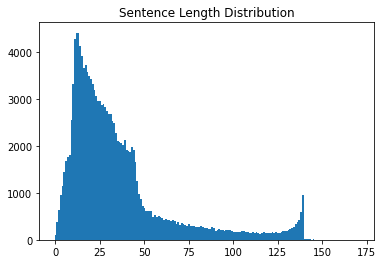

In [ ]:
min_len = 999
max_len = 0
sum_len = 0

for sen in raw_data['document']:
  length = len(sen)
  if min_len > length: min_len = length
  if max_len < length: max_len = length
  sum_len += length

print("문장의 최단 길이:", min_len)
print("문장의 최장 길이:", max_len)
print("문장의 평균 길이:", sum_len // len( raw_data['document']))

sentence_length = np.zeros((max_len), dtype=np.int)

for sen in  raw_data['document']:
  sentence_length[len(sen)-1] += 1

plt.pyplot.bar(range(max_len), sentence_length, width=1.0)
plt.pyplot.title("Sentence Length Distribution")
plt.pyplot.show()

### 기존의 check_sentence_with_length는 길이가 1인 corpus만 출력해주기 때문에 raw_data를 입력으로 정답라벨과 corpus를 같이 뽑아주도록 수정했습니다.

In [ ]:
def check_sentence_with_length(raw_data, length):
    count = 0
    
    for index in raw_data.index:
        if len(raw_data['document'][index]) == length:
            print(raw_data['label'][index], raw_data['document'][index])
            count += 1
            if count > 100: return

In [ ]:
check_sentence_with_length(raw_data, 1)

0 아
1 잼
0 1
0 4
0 영
1 굿
1 짱
1 휴
1 .
1 음
1 ?
1 ㅎ
1 ㅋ
0 즐
1 ♥
1 굳
1 네
0 ㅇ
1 k
1 ㅠ
0 쒯
1 ♬
1 토
1 O
0 똥
0 z
0 헐
0 삼
0 꽝
1 !
0 풉
0 ㅅ
0 왜
1 ㄴ
0 쉣
1 봐
1 뿌
0 ㅜ
1 ♡
1 ㅁ
0 0
0 ㅉ
1 d
0 흥
1 乃
1 찜
1 귯
1 린
1 시
0 ㅗ
1 a
0 c
0 흠
1 웅
1 ㅣ
0 오
1 9
1 쩜
1 애
0 헝
1 쨩
1 f
1 움
1 ㄳ
1 업
0 헉
1 군
0 b
1 ;
1 g
1 올
0 걍
0 허
1 -
0 쀍
0 로
0 ㄹ
1 ㅂ
1 갑
0 즛
0 킥
0 함
0 진
0 ㅡ
0 잠
0 곧
1 ㅍ
0 h
1 ·
1 캬
1 ㅆ
1 ,
0 풋
0 ㄱ
0 파
0 ㄷ
0 웩
0 꺅
0 욜
0 ㅄ
0 2


In [ ]:
check_sentence_with_length(raw_data, 2)

0 최고
0 졸작
1 대박
0 버려
0 망함
1 굳굳
0 안습
0 망작
1 굿!
0 별로
1 신나
0 쓰래
0 볼만
0 허접
0 비추
1 좋다
1 ㅎㅎ
0 아나
0 ㅉㅉ
0 야.
1 역시
1 ^^
1 오오
0 평이
0 지루
0 오욈
0 ㅋㅋ
0 지송
1 눈물
1 당연
1 쩔어
0 별노
1 몰입
1 졸잼
1 쵝오
1 돋네
0 오글
1 이응
0 첨봄
0 최악
1 잼씀
0 ok
1 유후
0 별루
1 감동
1 gg
0 ;;
1 조앙
0 1점
0 표절
1 명작
0 으휴
0 에효
1 ㄱ굿
1 굿잡
1 잼나
1 10
1 ㅜㅜ
1 우왕
0 거지
1 굿굿
1 좋음
0 실망
0 굿.
1 ㅇㅇ
0 애이
1 짱임
1 전설
0 mm
1 와우
0 등록
0 하위
0 그닥
1 뭉클
0 삼류
0 HN
1 윤하
1 섹시
1 실화
0 머냐
1 수작
1 꿀잼
0 동감
1 dd
1 굳ㅋ
1 굳!
1 추천
1 좋아
0 55
0 안봐
1 개쩜
1 올레
0 난해
0 ㅠㅠ
0 뭐니
0 ㅁㅁ
0 뭥미
0 쓰랙
0 좇~
1 오우
0 미안


In [ ]:
check_sentence_with_length(raw_data, 3)

1 좋구나
1 10점
1 처ㅝ주
0 솔직히
1 4대강
1 재밌다
1 재밌군
1 좋았다
1 볼만함
1 b b
1 dsa
1 웃소!
1 ♥♥♥
1 재밌네
1 최고다
1 재밌음
0 쓰레기
1 갑이다
1 료코짱
1 2빠닼
1 만세-
0 OOO
1 ㅋㅋㅋ
1 아하!
1 재및음
1 좋아여
1 재미쪙
1 대박!
0 에혀~
0 3.6
0 가보자
0 bad
1 신선함
1 와우!
0 즐ㄹㅋ
1 좋아요
0 아ㅅㅂ
1 쨩이야
1 굿~!
0 ㅉㅉㅉ
1 재밋다
0 지못미
0 나이스
0 오짱!
0 전형적
0 원주율
1 좋은테
0 2.6
1 굿!!
1 1등?
1 보세요
0 잼없다
1 다섯개
0 접어라
0 쓰중쓰
1 좋다.
0 음..
1 좋군.
0 싸우자
1 멋져.
0 ...
0 직인다
1 짱짱짱
0 별로임
1 진리임
1 감동적
1 최고!
1 재밌어
1 걍 굿
0 아시바
1 최고~
1 팬이다
0 별로다
1 좋다,
1 잼있다
0 최고.
1 감동!
0 잠온다
1 의리!
0 별로~
0 즐..
0 썩었내
1 짱멋짐
1 ㄴㄹㄴ
1 성룡짱
1 꿀잼♥
1 쵝오!
1 괜찮네
0 막장.
0 억지.
0 김서울
1 철규찡
1 무셔움
0 지겨워
1 꼭보셈
0 그다지
1 훌륭함
1 최고임
1 꼭봐라
0 일부심
1 예스잼


### 길이 1인 데이터는 의미없는 데이터 비율이 높아서 삭제하기로 하였습니다. 길이 2, 3 라벨링하기에 문제가 없어서 남겨두기로 하였습니다.

In [ ]:
# drop_idx = raw_data[len(raw_data['document'])>1]

In [ ]:
raw_data = raw_data[raw_data['document'].map(len) > 1]

# Sentence piece 학습 시작



In [ ]:
pwd

'/content/drive/MyDrive/GoingDeeper(NLP)/sp_tokenizer/data'

### 네이버 리뷰 부분 temp파일로 저장하기

In [ ]:
# import tempfile

In [ ]:
naver_review_corpus_temp = raw_data['document']
naver_review_file_name = 'naver_review_corpus.temp'

f = open(naver_review_file_name, 'w')
for review in naver_review_corpus_temp:
  f.write(review+'\n')
f.close()

In [ ]:
vocab_size = 10000

spm.SentencePieceTrainer.Train(
    "--input={} --model_prefix=korean_spm --vocab_size={}".format(naver_review_file_name, vocab_size) +
    " --pad_id=0 --pad_piece=[PAD]" + # pad (0)
    " --unk_id=1 --unk_piece=[UNK]" + # unknown (1)
    " --bos_id=2 --bos_piece=[BOS]" + # begin of sequence (2)
    " --eos_id=3 --eos_piece=[EOS]" ) # end of sequence (3)   

!ls -l korean_spm*

-rw------- 1 root root 413858 Mar 25 10:08 korean_spm.model
-rw------- 1 root root 184980 Mar 25 10:08 korean_spm.vocab


### sentencepiece 모델 확인

In [ ]:
s = spm.SentencePieceProcessor()
s.Load('korean_spm.model')

# SentencePiece를 활용한 sentence -> encoding
tokensIDs = s.EncodeAsIds('아버지가방에들어가신다.')
print(tokensIDs)

# SentencePiece를 활용한 sentence -> encoded pieces
print(s.SampleEncodeAsPieces('아버지가방에들어가신다.',1, 0.0))

# SentencePiece를 활용한 encoding -> sentence 복원
print(s.DecodeIds(tokensIDs))

[1273, 11, 450, 16, 1363, 11, 160, 20, 5]
['▁아버지', '가', '방', '에', '들어', '가', '신', '다', '.']
아버지가방에들어가신다.


# Step 3. Tokenizer 함수 작성

In [ ]:
def sp_tokenize(s, corpus):

    tensor = []

    for sen in corpus:
        tensor.append(s.EncodeAsIds(sen))

    with open("./korean_spm.vocab", 'r') as f:
        vocab = f.readlines()

    word_index = {}
    index_word = {}

    for idx, line in enumerate(vocab):
        word = line.split("\t")[0]

        word_index.update({idx:word})
        index_word.update({word:idx})

    tensor = tf.keras.preprocessing.sequence.pad_sequences(tensor, padding='post')

    return tensor, word_index, index_word

In [ ]:
#sp_tokenize(s, corpus) 사용예제

my_corpus = ['나는 밥을 먹었습니다.', '그러나 여전히 ㅠㅠ 배가 고픕니다...']
tensor, word_index, index_word = sp_tokenize(s, my_corpus)
print('tensor', tensor)
print('word_index', word_index)
print('index_word', index_word)

tensor [[ 511 2662   15 1225 2192    5    0    0    0    0]
 [1390 2293  284  626   11    4   17 9943 1129    9]]
word_index {0: '[PAD]', 1: '[UNK]', 2: '[BOS]', 3: '[EOS]', 4: '▁', 5: '.', 6: '..', 7: '이', 8: '▁영화', 9: '...', 10: '의', 11: '가', 12: '도', 13: '는', 14: ',', 15: '을', 16: '에', 17: '고', 18: '은', 19: '?', 20: '다', 21: '지', 22: '한', 23: '▁너무', 24: '를', 25: '!', 26: '만', 27: '▁정말', 28: '▁이', 29: '로', 30: '나', 31: '▁진짜', 32: '게', 33: '~', 34: '영화', 35: '과', 36: '기', 37: '으로', 38: '어', 39: '라', 40: '하고', 41: '점', 42: '인', 43: '서', 44: '▁안', 45: '▁잘', 46: '리', 47: '▁그', 48: '네', 49: '에서', 50: '▁왜', 51: '와', 52: '아', 53: '▁다', 54: '▁수', 55: '▁1', 56: '▁더', 57: '들', 58: '!!', 59: '▁이런', 60: '....', 61: '해', 62: '▁아', 63: '요', 64: '하는', 65: '▁그냥', 66: '거', 67: '▁드라마', 68: '자', 69: '네요', 70: '면', 71: '대', 72: '▁본', 73: '▁보고', 74: '스', 75: '▁10', 76: '▁연기', 77: '수', 78: '시', 79: '▁평점', 80: '지만', 81: '▁한', 82: '니', 83: '▁영화를', 84: '▁좀', 85: '▁내', 86: '야', 87: '일', 88: '음', 89: '함', 90: 

# Step 4. 네이버 영화리뷰 감정 분석 문제에 SentencePiece 적용해보기

### 1. 학습데이터, 테스트데이터 만들기
### 2. 모델생성 및 학습
### 3. 시각화

# 1. 학습데이터, 테스트데이터 만들기

In [ ]:
len(raw_data)

146083

### 현재 raw_data의 크기가 146081이다. 20%의 데이터는 약 3만개이므로, train데이터를 약 11만개, test 데이터를 3만개로 하여 테스트를 진행할 것이다.

In [ ]:
train_data = raw_data[:-30000]
valid_data = raw_data[-30000:]

In [ ]:
print(len(train_data), len(valid_data))

116083 30000


train_data와 valid_data 수의 합이 기존 데이터와 같으니, 잘 나뉘어졌습니다 :>

### 로드데이터 수정

In [ ]:
def load_data(train_data, valid_data, num_words=10000):

  # 전처리 과정을 추가해주려면 위에서 해줘야함 ㅠ_ㅠ


    train_list = []
    for sentence in train_data['document']:
        train_list.append(sentence)

    val_list = []
    for sentence in valid_data['document']:
        val_list.append(sentence)
    
    X_train, word_to_index, index_to_word = sp_tokenize(s, train_list)
    X_val , _,_ = sp_tokenize(s, val_list)

        
    return X_train, np.array(list(train_data['label'])), X_val, np.array(list(valid_data['label'])), word_to_index
    
X_train, y_train, X_val, y_val, word_to_index = load_data(train_data, valid_data)


In [ ]:
X_train


array([[  62,  870,    6, ...,    0,    0,    0],
       [1680,    9, 1342, ...,    0,    0,    0],
       [  23,  369, 9771, ...,    0,    0,    0],
       ...,
       [ 226,  558,   37, ...,    0,    0,    0],
       [ 869,   17,  726, ...,    0,    0,    0],
       [  47, 1411, 1397, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_train


array([0, 1, 0, ..., 0, 0, 1])

In [ ]:
X_val


array([[ 139,  162,   50, ...,    0,    0,    0],
       [ 139,   50, 2424, ...,    0,    0,    0],
       [  27,    4, 4513, ...,    0,    0,    0],
       ...,
       [ 139,  167,   63, ...,    0,    0,    0],
       [1861,  564, 5300, ...,    0,    0,    0],
       [ 252,    8, 4098, ...,    0,    0,    0]], dtype=int32)

In [ ]:
y_val

array([0, 0, 0, ..., 0, 1, 0])

In [ ]:
print(len(X_train), len(y_train))
print(len(X_val), len(y_val))

116083 116083
30000 30000


# 2. 모델생성 및 학습

지쳤으므로 LSTM만 생성해서 사용해봅니다.


In [ ]:
import keras
vocab_size = 10000    # 어휘 사전의 크기입니다(10,000개의 단어)
word_vector_dim = 256  # 워드 벡터의 차원 수 (변경 가능한 하이퍼파라미터)

In [ ]:
# model_LSTM 설계 - 딥러닝 모델 코드를 직접 작성해 주세요.
model_LSTM = keras.Sequential()
model_LSTM.add(keras.layers.Embedding(vocab_size, word_vector_dim, input_shape=(None,)))
model_LSTM.add(keras.layers.LSTM(20))   # 가장 널리 쓰이는 RNN인 LSTM 레이어를 사용하였습니다. 이때 LSTM state 벡터의 차원수는 8로 하였습니다. (변경 가능)
model_LSTM.add(keras.layers.Dense(8, activation='relu'))
model_LSTM.add(keras.layers.Dense(1, activation='sigmoid'))  # 최종 출력은 긍정/부정을 나타내는 1dim 입니다.

model_LSTM.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 256)         2560000   
                                                                 
 lstm (LSTM)                 (None, 20)                22160     
                                                                 
 dense (Dense)               (None, 8)                 168       
                                                                 
 dense_1 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,582,337
Trainable params: 2,582,337
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_LSTM.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['accuracy'])

epochs=10 # 훈련결과 보고 바꿔보기

history_lstm = model_LSTM.fit(X_train,
                  y_train,
                  epochs=epochs,
                  batch_size=512,
                  validation_data=(X_val,
                  y_val), 
                   verbose=1)

Epoch 1/10
227/227 [==============================] - 12s 24ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 2/10
227/227 [==============================] - 5s 22ms/step - loss: 0.6932 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 3/10
227/227 [==============================] - 5s 22ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 4/10
227/227 [==============================] - 5s 22ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 5/10
227/227 [==============================] - 5s 22ms/step - loss: 0.6932 - accuracy: 0.5004 - val_loss: 0.6931 - val_accuracy: 0.4957
Epoch 6/10
227/227 [==============================] - 5s 22ms/step - loss: 0.6931 - accuracy: 0.5007 - val_loss: 0.6931 - val_accuracy: 0.5044
Epoch 7/10
227/227 [==============================] - 5s 22ms/step - loss: 0.6931 - accuracy: 0.5011 - val_loss: 0.6931 - val_accuracy: 0.504

# 3. 시각화

In [ ]:
history_lstm_dict = history_lstm.history
print(history_lstm_dict.keys()) # epoch에 따른 그래프를 그려볼 수 있는 항목들


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [ ]:
acc = history_lstm_dict['accuracy']
val_acc = history_lstm_dict['val_accuracy']
loss = history_lstm_dict['loss']
val_loss = history_lstm_dict['val_loss']

epochs = range(1, len(acc) + 1)

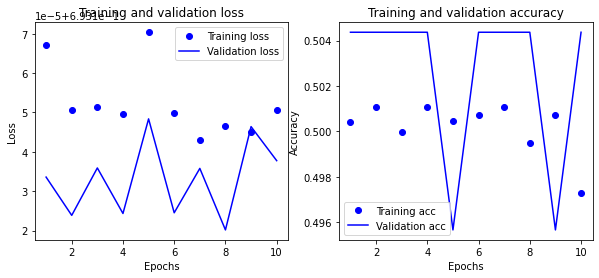

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 4))

# Loss 그래프
plt.subplot(1, 2, 1)
plt.plot(epochs, loss, 'bo', label='Training loss') # "bo"는 "파란색 점"
plt.plot(epochs, val_loss, 'b', label='Validation loss') # "b"는 "파란 실선"
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy 그래프
plt.subplot(1, 2, 2)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
# print(lstm_results)


NameError: ignored

# 지쳤으므로 익스 6에서 konlpy를 사용해서 나온 결과를 복붙해서 가져왔습니다^^

Word2Vec을 이용한부분아니고 konlpy를 했던 부분을 가져왔습니다.

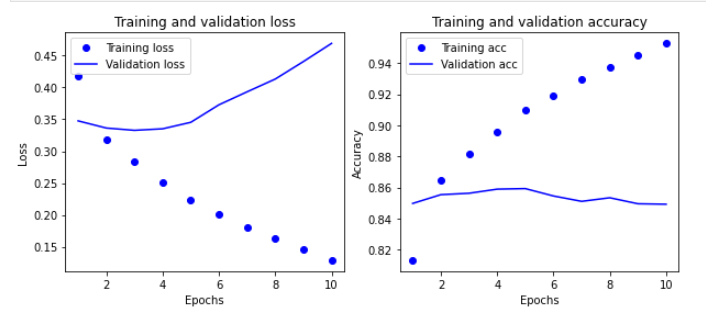

- konlpy 결과 loss와  acc

[0.4712178111076355, 0.8473259210586548]


# 결과 비교

이해한 대로 프로젝트를 만들었는데 예상과 다르게 학습이 전혀 진행되지 않은 것을 알 수 있습니다.ㅠㅠ 뭐가문젤가!!!

# 회고

1.다음과 같이 raw_data의 길이를 뽑는데 TypeError가 났다. 이 경우는 Nan값이 존재하는 경우 길이를 구할 수 없어서 나는 오류이다.

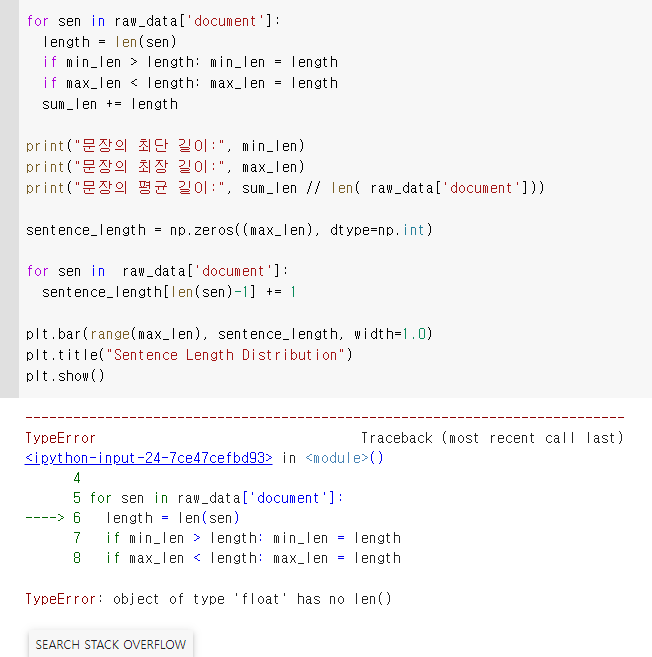

2. 판다스에서 특정 조건을 삭제하는 메소드가 자주 쓰인다. 이에 대해서 정리해보았다.

- 방법 1.

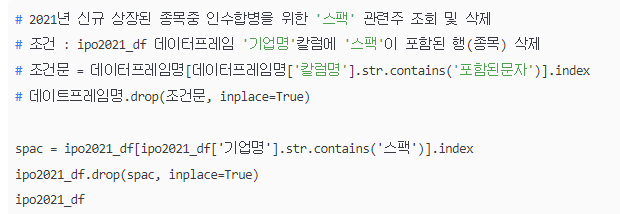


- 방법 2. DF = DF[DF.메뉴 != '돈까스']

3. 방법 1을 pandas 데이터 프레임을 이용해서 사용하면 keyError가 일어납니다. len(string)을 포함하는 조건식을 기반으로 pandas dataframe 행을 삭제하는 방법

- [출처](http://daplus.net/python-keyerror%EB%A5%BC%EC%A3%BC%EB%8A%94-len-string%EC%9D%84-%ED%8F%AC%ED%95%A8%ED%95%98%EB%8A%94-%EC%A1%B0%EA%B1%B4%EC%8B%9D%EC%9D%84-%EA%B8%B0%EB%B0%98%EC%9C%BC%EB%A1%9C-%ED%8C%AC%EB%8D%94-dat/)

> 오류 코드 : df[(len(df['column name']) < 2)]

> 해결 코드 : df[df['column name'].map(len) < 2]

4. 데이터의 양이 많아 모든 데이터에 hanspell 처리를 해주려면 정말 오래걸렸습니다. 데이터프레임을 병렬처리해주는 방법을 연구하고싶습니다.



 5. 저번부터 계속 헷갈렸던 건데, 판다스 dataframe을 for문으로 돌리려면 (컬럼 정보를 주고 값을 뽑아 낼 수 있는 for 문)으로 돌리려면 `for df in dataframe:`형식으로 뽑으면 안된다


 - [참고한 사이트](https://www.delftstack.com/ko/howto/python-pandas/how-to-iterate-through-rows-of-a-dataframe-in-pandas/)
1. Pandas DataFrame에서 행을 반복하는index 속성
2. 파이썬에서 DataFrame의 행을 반복하는loc[]메소드
3. 파이썬에서 DataFrame의 행을 반복하는iloc[]메소드
4. pandas.DataFrame.iterrows()는 행 Pandas를 반복합니다
5. pandas.DataFrame.itertuples는 행 Pandas를 반복합니다
6. pandas.DataFrame.apply는 행 Pandas를 반복합니다

메소드가 다양하므로 각각을 어떤 상황에서 써야하는지를 꼭 알아두자!

6. 특수문자 ♥과 ♥♥를 다르게 인식할것이므로, 전처리 단계에 특수문자 앞뒤로 공백을 추가하는 전처리를 추가해야겠다.

7. 파이썬에서 임시파일을 작성하는 방법

여기 노트북에서 이걸 시도했다가, 파일명을 설정하는방법을 모르겠고 일단 임시파일이 내가원하는 위치에 만들어지는게 아니라 특정 디렉토리에 자동으로 만들어지는 것 같아서 사용하지않았다.

- [참고 사이트](https://codechacha.com/ko/python-temp-file-and-dir/

8. 프로젝트를 진행 하다보니 네이버의 train데이터만 썼는데, 다음에는 처음부터 train과 test데이터를 concatenate 해서 그걸 다시 train / validate / test 데이터로 나눠서 사용해야겠다ㅠ_ㅠ

9. 전처리에서 불용어를 제거하지 않았다. ㅋㅋㅋㅋㅋㅋ 를 ㅋㅋ로, ㅠㅠㅠㅠㅠ를 ㅠㅠ정도로 작게 처리해주는 전처리작업도 추가하고싶다.

10. 고잉딥퍼가 이정도 수준일줄 몰랐따 진짜어렵다 정말정말정말정말정말정말정말 어렵다. 익스를 제대로 이해하고 있어야 하고, nlp에 대해 전반적인 이해가 좀 된 상태여야 막히지 않았을것같다. 정말 개념을 계속보고, 익스도 계속보고 고잉딥퍼도 계속봤는데 정~~~~~~~~~~말 어려워서 눈물날거같다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 

익스는 그래도 코드블록을 다 복붙으로 사용하면 프로젝트가 돌아갔는데 고잉딥퍼는 수정하지 않은 블록이 없는것같다. 오히려 너무 많이 수정해서 이렇게 하는게 맞는지 의구심이 들지경,, 사실 제출못할 줄알고 아예 천천히(물론 의도적인 천천히는 아니었따. 내 속도가 이정도밖에 안나는거지) 진행하고 있었는데 그래도 제출은 할 수있어 너무행복하다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ 이게 고잉딥퍼 첫번재 프로젝트면 후반부는 어떻게 되는거지 넘무 두렵다,,!
 
11. 학습이 제대로 되고있지 않은거 같은데 뭐가문젤까,,제발알려줘라ㅠ